<h1 style='color: blue; font-size: 28px; font-weight: bold;'>TECH CHALLENGE - FASE 3 - BIG DATA E CLOUD COMPUTING</h1>

# O Problema

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Esta é a terceira fase do projeto da Pós-Graduação Tech em Data Analytics da FIAP. Neste case, fomos contratados para atuar com Análise de Dados por um grande hospital para entender o comportamento da população na época da pandemia da COVID-19 e quais indicadores seriam importantes para o planejamento caso ocorra um novo surto.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
    A nossa área observou que a utilização do estudo da PNAD-COVID 19 do IBGE seria uma ótima base para obter respostas ao problema proposto. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A base de dados deverá conter os seguintes itens:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>    
<li>Utilização de até 20 questionamentos realizados na pesquisa;</li>
<li>Pelo menos 3 meses para construção da solução;</li>
<li>Caracterizar os sintomas clínicos da população;</li>
<li>Conter o comportamento da população na época da COVID-19;</li>
<li>Possuir características econômicas da Sociedade;</li>

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Nosso objetivo principal é trazer uma breve análise dessas informações, como foi a organização do banco de dados, as perguntas selecionadas para a resposta do problema e quais seriam as principais ações que o hospital deverá tomar em caso de um novo surto de COVID-19.

# Introdução

## O que é a PNAD?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A PNAD (Pesquisa Nacional por Amostra de Domicílios) tem como objetivo acompanhar as flutuações trimestrais e a evolução, no curto, médio e longo prazos, da força de trabalho, e outros dados para o estudo do desenvolvimento socioeconômico do País.

## PNAD COVID-19

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para acompanhar e estimar o número de pessoas com sintomas associados à pandemia da COVID-19, em março de 2020 a PNAD COVID-19 teve início. As entrevistas eram realizadas por telefone com amostras fixas, isto é, um domicílio entrevistado em um mês permanecerá como amostra nos meses seguintes até o final da pesquisa.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A pesquisa é conduzida por um questionário de duas partes, uma para questões de saúde e outra para questões de trabalho. Nas questões de saúde, investiga-se a ocorrência de alguns dos principais sintomas da COVID-19 no período de referência da pesquisa, considerando-se todos os moradores do domicílio. Para aqueles que apresentaram algum sintoma, questiona-se quais as providências tomadas para alívio dos sintomas. Nas questões de trabalho, procura-se classificar a população em idade de trabalhar nas categorias criadas para o trabalho e os aspectos da atividade econômica, tais como: horas trabalhadas, remuneração, afastamento e outros. E visando compor o rendimento domiciliar, pergunta-se se algum morador recebeu outros rendimentos não oriundos do trabalho, tais como: aposentadoria, BPC-LOAS, Bolsa Família, algum auxílio emergencial relacionado à COVID, seguro desemprego, aluguel e outros. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como a PNAD COVID-19 é uma pesquisa com instrumento dinâmico de coleta dos dados, o questionário pode sofrer alterações ao longo do período.

# Obtenção dos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Utilizando o questionário da PNAD COVID-19, selecionamos algumas perguntas para compor a base de dados.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Os dados foram obtidos por meio de uma query em SQL dentro do Google Big Query. A base de dados está disponível e pode ser acessada a partir das instruções conforme o link: 
    
https://basedosdados.org/dataset/c747a59f-b695-4d19-82e4-fef703e74c17?table=5894e1ac-dc08-465d-91a3-703683da85ba

## Premissas

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>    
<li>Período de estudo entre Maio de 2020 e Novembro de 2020;</li>
<li>Amostra populacional somente de pessoas que apresentaram sintomas relacionados à CODIV-19 na semana anterior à entrevista;</li>

## Construção do Banco

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Utilizaremos o Microsoft Azure para construir nosso banco de dados. O Microsoft Azure é uma plataforma destinada à execução de aplicativos e serviços, baseada em conceitos de Cloud Computing (Computação em Nuvem).
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Criaremos um SGBD na nuvem do Azure para disponibilizar um banco de dados relacional onde estará nosso arquivo .csv por meio do Azure SQL.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A técnica de criação do banco será a CLI (Command Line Interface), um conjunto de comandos técnicos com padrão internacional para ganhar escalabilidade.

### Criação do Grupo de Recursos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Criaremos um grupo de recursos para armazenar nossos dados e qualquer outra aplicação relacionada ao nosso projeto.

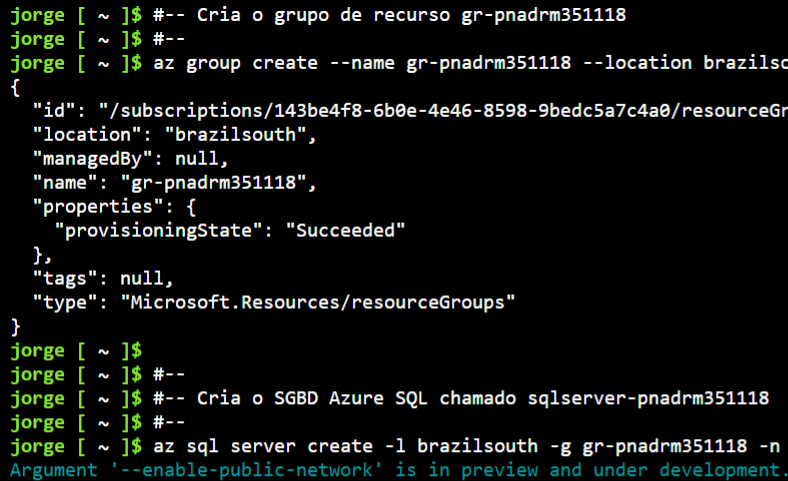

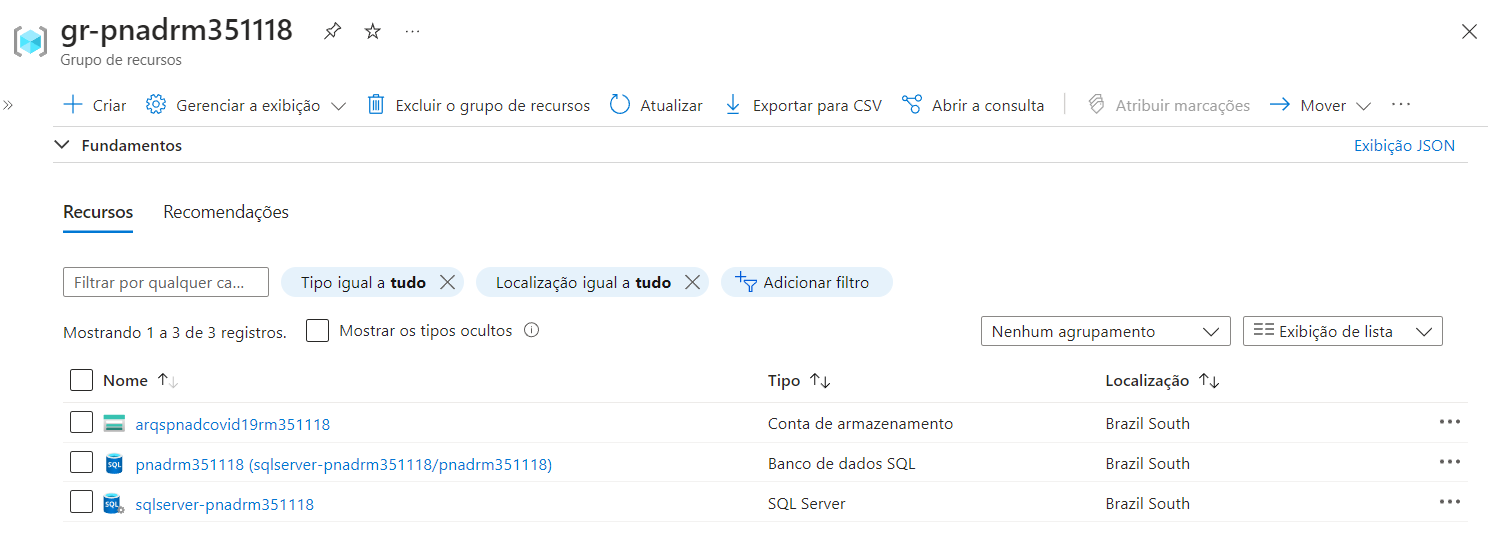

### Criação da Consulta - Google Big Query

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Dentro do Google Big Query criaremos uma consulta em SQL para obter todos os campos que selecionamos, relacionados ao questionário da PNAD COVID-19.

In [ ]:
'''

SELECT 
      PNAD.MES                                              AS mes
    , PNAD.SIGLA_UF                                         AS uf
    , IF(CAST(PNAD.A002 AS INT64) <= 19, "Jovens",
        IF(CAST(PNAD.A002 AS INT64) > 20 
            AND CAST(PNAD.A002 AS INT64) <= 59, "Adultos",
                "Idosos"))                                  AS faixa_etaria
    , PNAD.A003                                             AS id_sexo
    , PNAD.A004                                             AS id_grupo
    , PNAD.A005                                             AS id_escolaridade   
    , COUNT(*)                                              AS qtd_pop
    , SUM(IF(CAST(PNAD.B002 AS INT64) = 1, 1, 0))           AS qtd_pop_visitou_estab_saude
    , SUM(IF(CAST(PNAD.B002 AS INT64) = 2, 1, 0))           AS qtd_pop_nao_visitou_estab_saude 
    , SUM(IF(CAST(PNAD.B0031 AS INT64) = 1, 1, 0))          AS qtd_pop_nao_visitou_estab_saude_ficou_em_casa 
    , SUM(IF(CAST(PNAD.B0032 AS INT64) = 1, 1, 0))          AS qtd_pop_nao_visitou_estab_saude_ligou_prof_saude 
    , SUM(IF(CAST(PNAD.B0033 AS INT64) = 1, 1, 0))          AS qtd_pop_nao_visitou_estab_saude_auto_medicou 
    , SUM(IF(CAST(PNAD.B0034 AS INT64) = 1, 1, 0))          AS qtd_pop_nao_visitou_estab_saude_recebeu_medicacao
    , SUM(IF(CAST(PNAD.B0035 AS INT64) = 1, 1, 0))          AS qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_sus 
    , SUM(IF(CAST(PNAD.B0036 AS INT64) = 1, 1, 0))          AS qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_part 
    , SUM(IF(CAST(PNAD.B0037 AS INT64) = 1, 1, 0))          AS qtd_pop_nao_visitou_estab_saude_outro
    , SUM(IF(CAST(PNAD.B0041 AS INT64) = 1, 1, 0))          AS qtd_pop_posto_saude
    , SUM(IF(CAST(PNAD.B0042 AS INT64) = 1, 1, 0))          AS qtd_pop_pronto_socorro_sus
    , SUM(IF(CAST(PNAD.B0043 AS INT64) = 1, 1, 0))          AS qtd_pop_hospital_sus
    , SUM(IF(CAST(PNAD.B0044 AS INT64) = 1, 1, 0))          AS qtd_pop_ambulatorios_privado
    , SUM(IF(CAST(PNAD.B0045 AS INT64) = 1, 1, 0))          AS qtd_pop_pronto_socorro_privado
    , SUM(IF(CAST(PNAD.B0046 AS INT64) = 1, 1, 0))          AS qtd_pop_hospital_privado 
    , SUM(IF(CAST(PNAD.B005 AS INT64) = 1, 1, 0))           AS qtd_pop_foi_internada
    , SUM(IF(CAST(PNAD.B005 AS INT64) = 2, 1, 0))           AS qtd_pop_nao_foi_internada
    , SUM(IF(CAST(PNAD.B005 AS INT64) = 3, 1, 0))           AS qtd_pop_nao_foi_atendida
    , SUM(IF(CAST(PNAD.B008 AS INT64) = 1, 1, 0))           AS qtd_pop_fez_teste_covid
    , SUM(IF(CAST(PNAD.B009A AS INT64) = 1, 1, 0))          AS qtd_pop_fez_teste_covid_swab
    , SUM(IF(CAST(PNAD.B009B AS INT64) = 1, 1, 0))          AS qtd_pop_teste_swab_positivo
    , SUM(IF(CAST(PNAD.B009B AS INT64) = 2, 1, 0))          AS qtd_pop_teste_swab_negativo
    , SUM(IF(CAST(PNAD.B009B AS INT64) = 3, 1, 0))          AS qtd_pop_teste_swab_inconclusivo
    , SUM(IF(CAST(PNAD.B009B AS INT64) = 4, 1, 0))          AS qtd_pop_teste_swab_sem_resultado
    , SUM(IF(CAST(PNAD.B009C AS INT64) = 1, 1, 0))          AS qtd_pop_fez_teste_covid_furo_dedo
    , SUM(IF(CAST(PNAD.B009D AS INT64) = 1, 1, 0))          AS qtd_pop_teste_furo_dedo_positivo
    , SUM(IF(CAST(PNAD.B009D AS INT64) = 2, 1, 0))          AS qtd_pop_teste_furo_dedo_negativo
    , SUM(IF(CAST(PNAD.B009D AS INT64) = 3, 1, 0))          AS qtd_pop_teste_furo_dedo_inconclusivo
    , SUM(IF(CAST(PNAD.B009D AS INT64) = 4, 1, 0))          AS qtd_pop_teste_furo_dedo_sem_resultado
    , SUM(IF(CAST(PNAD.B009E AS INT64) = 1, 1, 0))          AS qtd_pop_fez_teste_covid_veia
    , SUM(IF(CAST(PNAD.B009F AS INT64) = 1, 1, 0))          AS qtd_pop_teste_veia_positivo
    , SUM(IF(CAST(PNAD.B009F AS INT64) = 2, 1, 0))          AS qtd_pop_teste_veia_negativo
    , SUM(IF(CAST(PNAD.B009F AS INT64) = 3, 1, 0))          AS qtd_pop_teste_veia_inconclusivo
    , SUM(IF(CAST(PNAD.B009F AS INT64) = 4, 1, 0))          AS qtd_pop_teste_veia_sem_resultado
    , SUM(IFNULL(PNAD.C01012, 0))                           AS vl_ganho_mes_referencia
    , SUM(IF(CAST(PNAD.D0011 AS INT64) = 1, 1, 0))          AS qtd_pop_recebeu_aposentadoria_pensao
    , SUM(IF(CAST(PNAD.D0021 AS INT64) = 1, 1, 0))          AS qtd_pop_recebeu_pensao_alimenticia
    , SUM(IF(CAST(PNAD.D0031 AS INT64) = 1, 1, 0))          AS qtd_pop_recebeu_bolsa_familia
    , SUM(IF(CAST(PNAD.D0041 AS INT64) = 1, 1, 0))          AS qtd_pop_recebeu_bpc_loas
    , SUM(IF(CAST(PNAD.D0051 AS INT64) = 1, 1, 0))          AS qtd_pop_recebeu_auxilio_emergencial
    , SUM(IF(CAST(PNAD.D0061 AS INT64) = 1, 1, 0))          AS qtd_pop_recebeu_seguro_desemprego
    , SUM(IF(CAST(PNAD.D0071 AS INT64) = 1, 1, 0))          AS qtd_pop_recebeu_outros_rendimentos
    
FROM `basedosdados.br_ibge_pnad_covid.microdados` PNAD 

WHERE   
(
CAST(PNAD.B0011 AS INT64) = 1 OR CAST(PNAD.B0012 AS INT64) = 1 OR
CAST(PNAD.B0013 AS INT64) = 1 OR CAST(PNAD.B0014 AS INT64) = 1 OR
CAST(PNAD.B0015 AS INT64) = 1 OR CAST(PNAD.B0016 AS INT64) = 1 OR
CAST(PNAD.B0017 AS INT64) = 1 OR CAST(PNAD.B0018 AS INT64) = 1 OR
CAST(PNAD.B0019 AS INT64) = 1 OR CAST(PNAD.B00110 AS INT64) = 1 OR
CAST(PNAD.B00111 AS INT64) = 1 OR CAST(PNAD.B00112 AS INT64) = 1 OR
CAST(PNAD.B00113 AS INT64) = 1 
)

GROUP BY 
      PNAD.MES                                              
    , PNAD.SIGLA_UF                                         
    , IF(CAST(PNAD.A002 AS INT64) <= 19, "Jovens",
        IF(CAST(PNAD.A002 AS INT64) > 20 
            AND CAST(PNAD.A002 AS INT64) <= 59, "Adultos",
                "Idosos"))                                             
    , PNAD.A003                                             
    , PNAD.A004                                             
    , PNAD.A005                                             

ORDER BY 1,2

'''

### Geração do Arquivo .csv

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    No próprio Google Big Query temos a opção de salvar os resultados da nossa consulta como um arquivo .csv

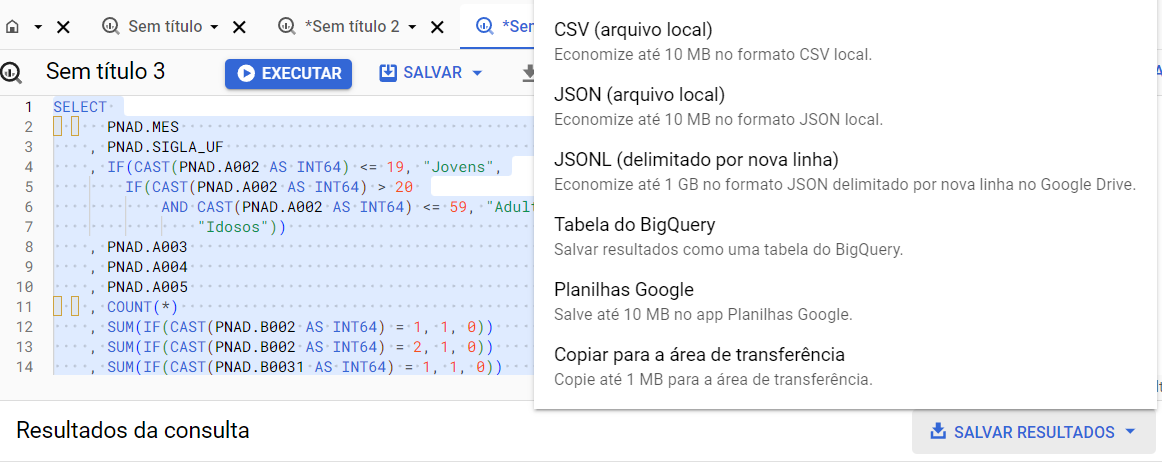

### Criação da Tabela no Banco de Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Com o arquivo .csv podemos subir a tabela pronta no banco e testar se nossos dados estão em nuvem. Com o dados em nuvem podemos simplesmente consultá-los de forma simples e rápida.

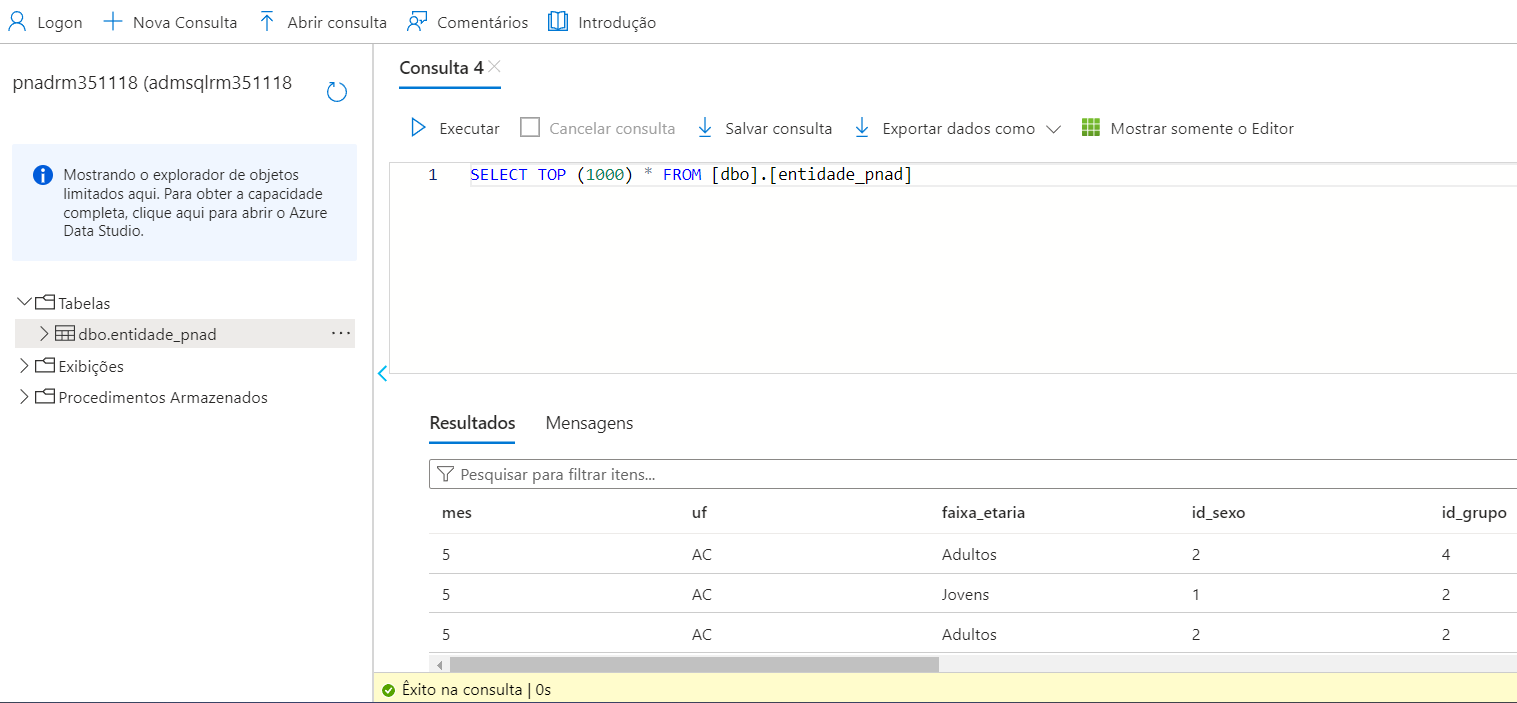

### Arquitetura de Criação do Banco de Dados

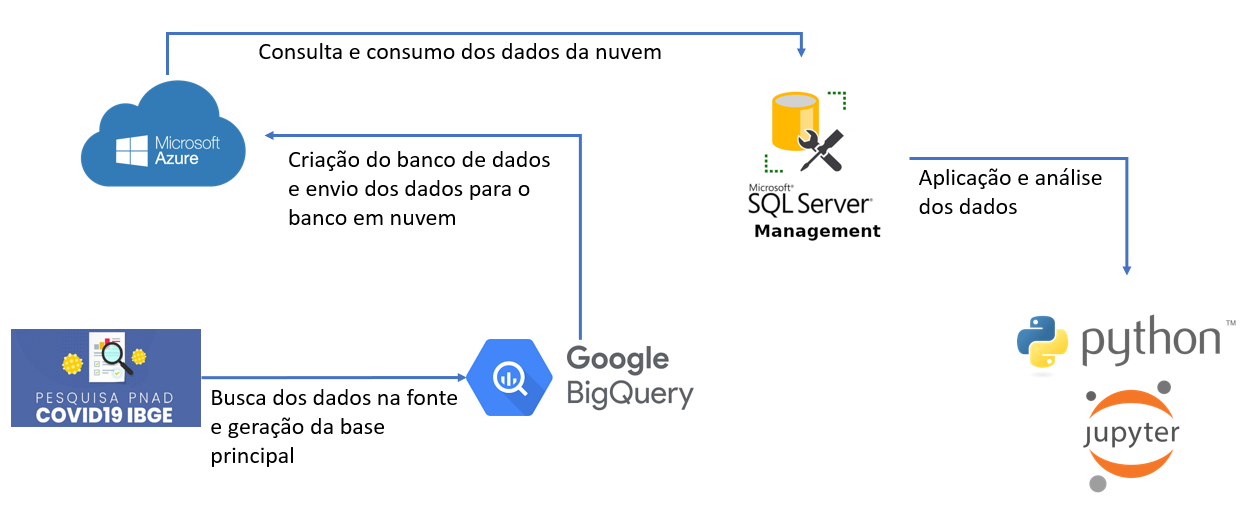

# Apresentação dos Dados

## Importanto Bibliotecas

In [2]:
# Bibliotecas para Análise a Manipulação de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_theme(style='white')
%matplotlib inline

## Visualização dos Dados

In [3]:
dados = pd.read_csv('consulta_geral.csv')
dados.head()

,mes,uf,faixa_etaria,id_sexo,id_grupo,id_escolaridade,qtd_pop,qtd_pop_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude_ficou_em_casa,...,qtd_pop_teste_veia_inconclusivo,qtd_pop_teste_veia_sem_resultado,vl_ganho_mes_referencia,qtd_pop_recebeu_aposentadoria_pensao,qtd_pop_recebeu_pensao_alimenticia,qtd_pop_recebeu_bolsa_familia,qtd_pop_recebeu_bpc_loas,qtd_pop_recebeu_auxilio_emergencial,qtd_pop_recebeu_seguro_desemprego,qtd_pop_recebeu_outros_rendimentos
0,5,AC,Adultos,2,4,8,9,0,9,8,...,0,0,26973.0,1,2,1,0,4,0,1
1,5,AC,Jovens,1,2,5,1,0,1,1,...,0,0,0.0,0,0,0,0,1,0,0
2,5,AC,Adultos,2,2,5,3,0,3,2,...,0,0,450.0,0,0,0,0,3,0,0
3,5,AC,Jovens,2,4,2,15,0,15,14,...,0,0,0.0,2,1,5,1,8,0,0
4,5,AC,Jovens,2,1,4,3,0,3,3,...,0,0,0.0,0,1,0,1,3,0,0


# Tratamento dos Dados

In [4]:
dados.shape

(19165, 49)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19165 entries, 0 to 19164
Data columns (total 49 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   mes                                                       19165 non-null  int64  
 1   uf                                                        19165 non-null  object 
 2   faixa_etaria                                              19165 non-null  object 
 3   id_sexo                                                   19165 non-null  int64  
 4   id_grupo                                                  19165 non-null  int64  
 5   id_escolaridade                                           19165 non-null  int64  
 6   qtd_pop                                                   19165 non-null  int64  
 7   qtd_pop_visitou_estab_saude                               19165 non-null  int64  
 8   qtd_pop_nao_visi

In [6]:
ds_mes = {5:'Mai',
          6:'Jun',
          7:'Jul',
          8:'Ago',
          9:'Set',
          10:'Out',
          11:'Nov'
         }

ds_sexo = {1:'M',
           2:'F'
          }

ds_grupo =    {1:'Grupo A',
               2:'Grupo B',
               3:'Grupo C',
               4:'Grupo D',
               5:'Grupo E',
               9:'Grupo F'
              }

ds_escolaridade = {1:'Sem instrução',
                   2:'Fundamental incompleto',
                   3:'Fundamental completo',
                   4:'Médio incompleto',
                   5:'Médio completo',
                   6:'Superior incompleto',
                   7:'Superior completo',
                   8:'Especialização completo'
                  }

dados['ds_mes'] = dados['mes'].apply(lambda x: ds_mes[x])
dados['ds_sexo'] = dados['id_sexo'].apply(lambda x: ds_sexo[x])
dados['ds_grupo'] = dados['id_grupo'].apply(lambda x: ds_grupo[x])
dados['ds_escolaridade'] = dados['id_escolaridade'].apply(lambda x: ds_escolaridade[x])
dados.head()

,mes,uf,faixa_etaria,id_sexo,id_grupo,id_escolaridade,qtd_pop,qtd_pop_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude_ficou_em_casa,...,qtd_pop_recebeu_pensao_alimenticia,qtd_pop_recebeu_bolsa_familia,qtd_pop_recebeu_bpc_loas,qtd_pop_recebeu_auxilio_emergencial,qtd_pop_recebeu_seguro_desemprego,qtd_pop_recebeu_outros_rendimentos,ds_mes,ds_sexo,ds_grupo,ds_escolaridade
0,5,AC,Adultos,2,4,8,9,0,9,8,...,2,1,0,4,0,1,Mai,F,Grupo D,Especialização completo
1,5,AC,Jovens,1,2,5,1,0,1,1,...,0,0,0,1,0,0,Mai,M,Grupo B,Médio completo
2,5,AC,Adultos,2,2,5,3,0,3,2,...,0,0,0,3,0,0,Mai,F,Grupo B,Médio completo
3,5,AC,Jovens,2,4,2,15,0,15,14,...,1,5,1,8,0,0,Mai,F,Grupo D,Fundamental incompleto
4,5,AC,Jovens,2,1,4,3,0,3,3,...,1,0,1,3,0,0,Mai,F,Grupo A,Médio incompleto


# Análise Exploratória dos Dados

## Estatísticas Descritivas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como nossa base utiliza a maior parte dos campos apenas para contar a quantidade da população, vamos realizar a análise de estatístivas descritivas do único campo de valor monetário que temos, o valor ganho no mês referência.

In [7]:
dados['vl_ganho_mes_referencia'].describe()

count     19165.000000
mean       7965.295591
std       24206.163688
min           0.000000
25%           0.000000
50%        1045.000000
75%        5301.000000
max      655864.000000
Name: vl_ganho_mes_referencia, dtype: float64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Podemos ver que a média e o desvio padrão são altos e que estão mais perto do valor máximo do que do valor mínimo.

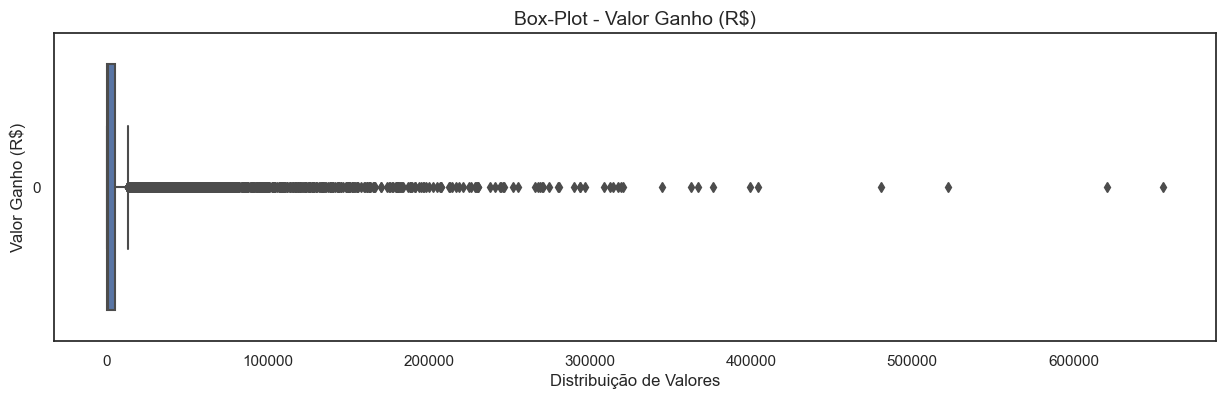

In [8]:
plt.figure(figsize=(15,4))

ax = sns.boxplot(data=dados['vl_ganho_mes_referencia'], orient='h')
ax.set_title(f'Box-Plot - Valor Ganho (R$)', fontsize=14)
ax.set_xlabel('Distribuição de Valores', fontsize=12)
ax.set_ylabel('Valor Ganho (R$)', fontsize=12)

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Quando falamos de renda de uma população é comum termos o comportamento acima, onde existem diversos outliers e uma grande assimetria à direita do gráfico. Isso é consequência de uma distribuição não equilibrada onde, uma pequena parcela da população  possui uma renda muito maior em comparação com a outra parcela. Como é um comportamento esperado, não necessariamente os outliers estão errados e precisam ser retirados da análise.

## Análise das Características Sociais da População

In [9]:
dados_sociais = dados.copy()
dados_sociais.head()

,mes,uf,faixa_etaria,id_sexo,id_grupo,id_escolaridade,qtd_pop,qtd_pop_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude_ficou_em_casa,...,qtd_pop_recebeu_pensao_alimenticia,qtd_pop_recebeu_bolsa_familia,qtd_pop_recebeu_bpc_loas,qtd_pop_recebeu_auxilio_emergencial,qtd_pop_recebeu_seguro_desemprego,qtd_pop_recebeu_outros_rendimentos,ds_mes,ds_sexo,ds_grupo,ds_escolaridade
0,5,AC,Adultos,2,4,8,9,0,9,8,...,2,1,0,4,0,1,Mai,F,Grupo D,Especialização completo
1,5,AC,Jovens,1,2,5,1,0,1,1,...,0,0,0,1,0,0,Mai,M,Grupo B,Médio completo
2,5,AC,Adultos,2,2,5,3,0,3,2,...,0,0,0,3,0,0,Mai,F,Grupo B,Médio completo
3,5,AC,Jovens,2,4,2,15,0,15,14,...,1,5,1,8,0,0,Mai,F,Grupo D,Fundamental incompleto
4,5,AC,Jovens,2,1,4,3,0,3,3,...,1,0,1,3,0,0,Mai,F,Grupo A,Médio incompleto


### Análise por Grupo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos analisar a quantidade da população em relação a cor e raça. Vale ressaltar que apesar dos dados serem anonimizados, nós optamos por não apresentar a classificação real da cor ou raça adotada pela PNAD COVID-19 e subtituímos as categorias por grupos.

In [10]:
dados_por_grupo = dados_sociais.groupby(['ds_sexo', 'ds_grupo'])[['qtd_pop']].sum().reset_index()
dados_por_grupo.head()

,ds_sexo,ds_grupo,qtd_pop
0,F,Grupo A,37428
1,F,Grupo B,8357
2,F,Grupo C,695
3,F,Grupo D,45568
4,F,Grupo E,533


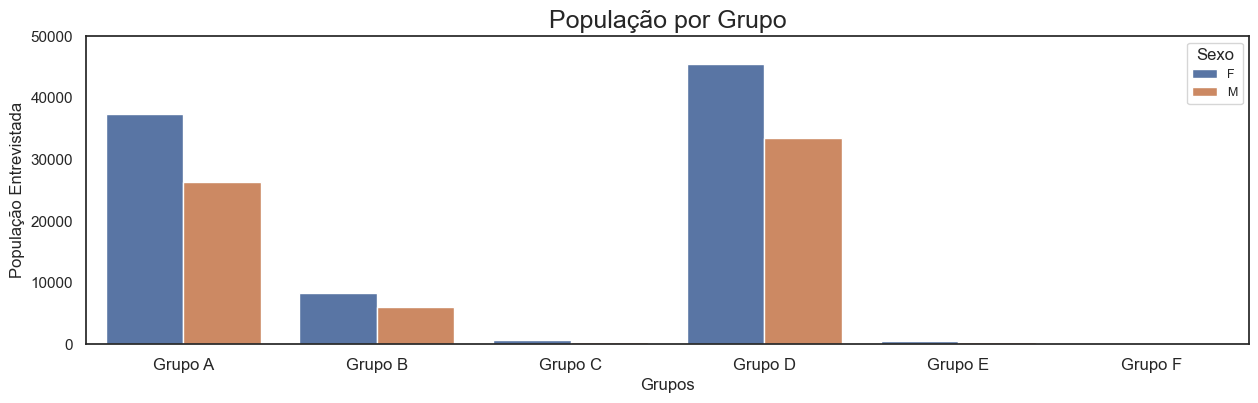

In [11]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=dados_por_grupo, x='ds_grupo', y='qtd_pop', hue='ds_sexo')
xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)
ax.set_yticks(ticks = ytick_loc, fontsize = 12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

ax.set_xlabel('Grupos', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.set_title(f'População por Grupo', fontsize = 18, horizontalalignment = "center")
plt.legend(title='Sexo', loc='best', fontsize=9)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Podemos observar que a maior parte da população com sintomas se concentra nos grupos A e D. Os grupos C, E e F são os que possuem as menores quantidade de pessoas. O grupo B, apesar de possuir poucas em pessoas em relação aos grupos A e D, é o terceiro maior grupo.

### Análise por Escolaridade

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Analisaremos como a população entrevistada se divide por grau de escolaridade e por faixa etária.

In [12]:
dados_por_escolaridade = dados_sociais.groupby(['faixa_etaria', 'ds_escolaridade'])[['qtd_pop']].sum().reset_index()
dados_por_escolaridade.head()

,faixa_etaria,ds_escolaridade,qtd_pop
0,Adultos,Especialização completo,5150
1,Adultos,Fundamental completo,6883
2,Adultos,Fundamental incompleto,22336
3,Adultos,Médio completo,31317
4,Adultos,Médio incompleto,7944


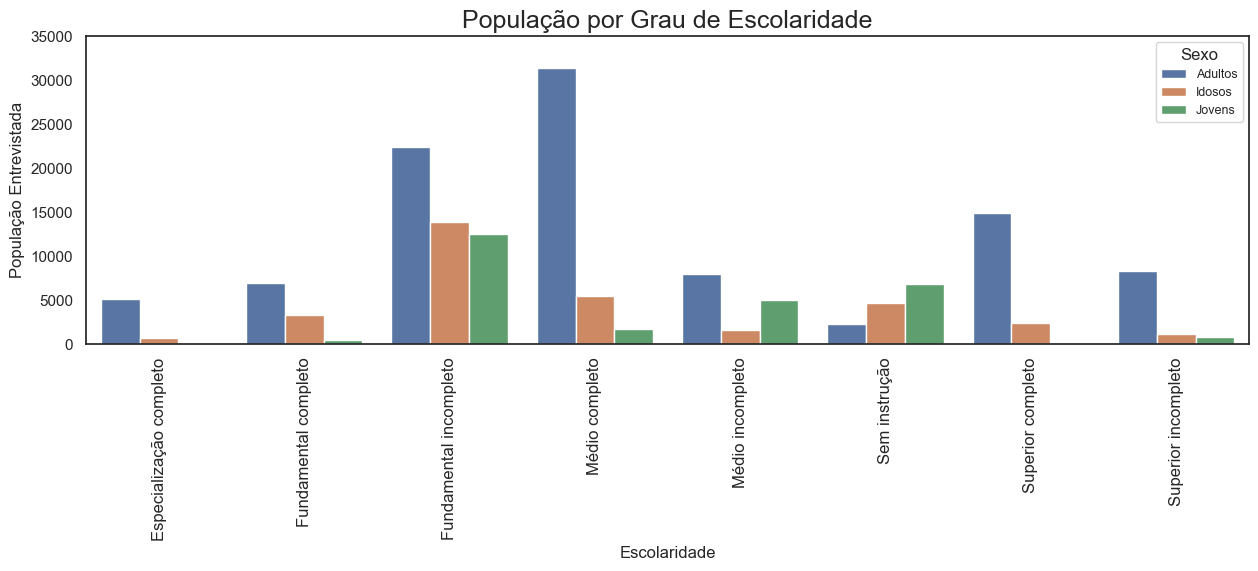

In [13]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=dados_por_escolaridade, x='ds_escolaridade', y='qtd_pop', hue='faixa_etaria')
xtick_loc = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ytick_loc = ax.get_yticks()
ytick_labels = ax.get_yticklabels()

ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12, rotation=90)
ax.set_yticks(ticks = ytick_loc, fontsize = 12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

ax.set_xlabel('Escolaridade', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.set_title(f'População por Grau de Escolaridade', fontsize = 18, horizontalalignment = "center")
plt.legend(title='Sexo', loc='best', fontsize=9)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Quando olhamos para a escolaridade, notamos alguns pontos interessantes:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'> 
<li>Nos grupos "Sem Instrução" e "Fundamental Incompleto" existe uma parcela expressiva composta por jovens e idosos, o que é preocupante;</li>
<li>A população adulta é a que mais completou os estudos. Entretanto, a maior parte dos adultos só tem até o ensino médio completo;</li>

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Aqui vale a reflexão do quanto o cenário da educação no Brasil contribuiu para a propagação do vírus da COVID-19. É comum que pessoas com menos instrução não ocupem empregos mais executivos e muito provavelmente essas pessoas não tiveram a oportunidade de trabalhar por meio do home-office durante a pandemia. Jovens sem instrução, também não conseguem empregos em empresas e acabam por ter que trabalhar com ofícios mais operacionais e de campo, o que aumenta a exposição ao vírus.

## Caracterização dos Sintomas Clínicos e Comportamento da População

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Dentro desta análise iremos verificar o comportamento da população com sintomas.

In [14]:
dados_comportamento = dados.copy()
dados_comportamento.head()

,mes,uf,faixa_etaria,id_sexo,id_grupo,id_escolaridade,qtd_pop,qtd_pop_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude_ficou_em_casa,...,qtd_pop_recebeu_pensao_alimenticia,qtd_pop_recebeu_bolsa_familia,qtd_pop_recebeu_bpc_loas,qtd_pop_recebeu_auxilio_emergencial,qtd_pop_recebeu_seguro_desemprego,qtd_pop_recebeu_outros_rendimentos,ds_mes,ds_sexo,ds_grupo,ds_escolaridade
0,5,AC,Adultos,2,4,8,9,0,9,8,...,2,1,0,4,0,1,Mai,F,Grupo D,Especialização completo
1,5,AC,Jovens,1,2,5,1,0,1,1,...,0,0,0,1,0,0,Mai,M,Grupo B,Médio completo
2,5,AC,Adultos,2,2,5,3,0,3,2,...,0,0,0,3,0,0,Mai,F,Grupo B,Médio completo
3,5,AC,Jovens,2,4,2,15,0,15,14,...,1,5,1,8,0,0,Mai,F,Grupo D,Fundamental incompleto
4,5,AC,Jovens,2,1,4,3,0,3,3,...,1,0,1,3,0,0,Mai,F,Grupo A,Médio incompleto


### Pessoas com sintomas, procuraram estabelecimentos de saúde?

In [15]:
dados_visitou_estab_saude = dados_comportamento.groupby(['mes','ds_mes']).sum().reset_index()
dados_visitou_estab_saude['percentual'] = round(dados_visitou_estab_saude['qtd_pop_visitou_estab_saude'] / dados_visitou_estab_saude['qtd_pop'] * 100, 2)
dados_visitou_estab_saude.head()

,mes,ds_mes,id_sexo,id_grupo,id_escolaridade,qtd_pop,qtd_pop_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude_ficou_em_casa,qtd_pop_nao_visitou_estab_saude_ligou_prof_saude,...,qtd_pop_teste_veia_sem_resultado,vl_ganho_mes_referencia,qtd_pop_recebeu_aposentadoria_pensao,qtd_pop_recebeu_pensao_alimenticia,qtd_pop_recebeu_bolsa_familia,qtd_pop_recebeu_bpc_loas,qtd_pop_recebeu_auxilio_emergencial,qtd_pop_recebeu_seguro_desemprego,qtd_pop_recebeu_outros_rendimentos,percentual
0,5,Mai,4867,8254,12955,38166,6032,32119,26736,1902,...,0,39093332.0,12152,2472,5072,1293,18150,872,2029,15.80
1,6,Jun,4600,7810,12337,28280,5715,22557,18712,1253,...,0,27552556.0,9289,1846,2508,1090,15019,634,1570,20.21
2,7,Jul,4427,7379,11769,25433,5761,19661,15542,862,...,112,24177934.0,8522,1703,1519,1047,13276,593,1464,22.65
3,8,Ago,4273,7147,11193,22551,5312,17228,12901,695,...,85,20433152.0,7529,1446,1279,948,12068,484,1268,23.56
4,9,Set,3863,6478,10086,16862,4107,12752,9341,369,...,66,15618841.0,5956,1091,742,724,8676,283,1084,24.36


<Figure size 1500x800 with 0 Axes>

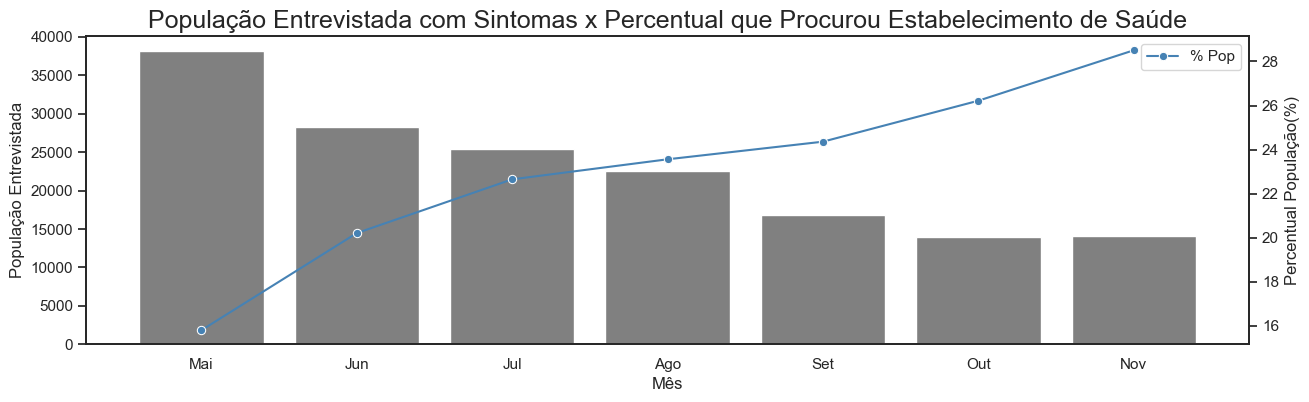

In [16]:
plt.figure(figsize=(15,8))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

# Gráfico 1 - População entrevistada
ax1 = sns.barplot(data=dados_visitou_estab_saude, x='ds_mes', y='qtd_pop', color='gray', ax=ax1)
ax1.figure.set_size_inches(15,4)
ax1.set_title(f'População Entrevistada com Sintomas x Percentual que Procurou Estabelecimento de Saúde', fontsize = 18, horizontalalignment = "center")
ax1.set_xlabel('Mês', fontsize = 12)
ax1.set_ylabel('População Entrevistada', fontsize = 12)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

# Gráfico 2 - Percentual que procurou um estabelecimento de saúde
ax2 = sns.lineplot(data=dados_visitou_estab_saude, x='ds_mes', y='percentual', color='steelblue', marker='o', ax=ax2)
ax2.set_ylabel('Percentual População(%)', fontsize=12)

plt.legend(['% Pop'], loc="best")

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Podemos observar um aumento do percentual de pessoas que procuraram um estabalecimento de saúde após sentir algum sintoma. Esse aumento é natural quando observamos que a quantidade de pessoas entrevistadas com sintomas diminui com o passar do tempo. Entretanto, podemos levar em consideração que existiu um comportamento mais resistente por parte da população no começo da pandemia em procurar um estabelecimento de saúde, por falta de informações ou conhecimento da gravidade do vírus. Conforme o tempo passou e o cenário da pandemia se agravou, se tornou comum o aumento da procura por estabelecimentos de saúde ao sinal de qualquer sintoma relacioado ao vírus.

### Em quais locais estas pessoas procuraram ajuda?

In [17]:
colunas_locais = ['qtd_pop', 'qtd_pop_visitou_estab_saude', 'qtd_pop_posto_saude',
                  'qtd_pop_pronto_socorro_sus','qtd_pop_hospital_sus', 'qtd_pop_ambulatorios_privado',
                  'qtd_pop_pronto_socorro_privado','qtd_pop_hospital_privado']

ds_locais = {'qtd_pop_posto_saude':'Posto de Saúde',
             'qtd_pop_pronto_socorro_sus':'Pronto Socorro do SUS',
             'qtd_pop_hospital_sus':'Hospital do SUS',
             'qtd_pop_ambulatorios_privado':'Ambulatório Privado',
             'qtd_pop_pronto_socorro_privado':'Pronto Socorro Privado',
             'qtd_pop_hospital_privado':'Hospital Privado'
            }

df_locais = dados_visitou_estab_saude[colunas_locais[2:]].T
df_locais['total'] = df_locais.apply(lambda x: sum(x[:]), axis=1)
df_locais = df_locais.reset_index()
df_locais['local'] = df_locais['index'].apply(lambda x: ds_locais[x])
df_locais

,index,0,1,2,3,4,5,6,total,local
0,qtd_pop_posto_saude,2906,2898,2873,2648,2088,1694,1809,16916,Posto de Saúde
1,qtd_pop_pronto_socorro_sus,1369,1169,1158,1072,747,808,864,7187,Pronto Socorro do SUS
2,qtd_pop_hospital_sus,1152,1240,1079,994,749,687,688,6589,Hospital do SUS
3,qtd_pop_ambulatorios_privado,577,555,498,452,373,328,384,3167,Ambulatório Privado
4,qtd_pop_pronto_socorro_privado,225,152,193,189,152,124,201,1236,Pronto Socorro Privado
5,qtd_pop_hospital_privado,649,507,584,451,338,367,475,3371,Hospital Privado


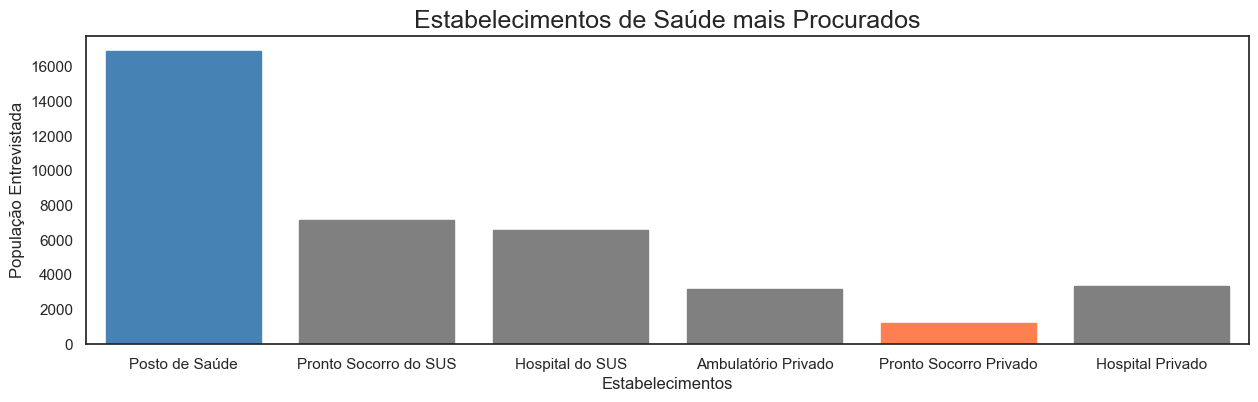

In [18]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=df_locais, x='local', y='total', color='gray')

maior = df_locais['total'].max()
menor = df_locais['total'].min()

for bar in ax.patches:
        if bar.get_height() == maior:
            bar.set_color('steelblue')    
        elif bar.get_height() == menor:
            bar.set_color('coral')
        else:
            bar.set_color('gray')

ax.set_title(f'Estabelecimentos de Saúde mais Procurados', fontsize = 18, horizontalalignment = "center")
ax.set_xlabel('Estabelecimentos', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Existiu uma procura maior por postos de saúde por parte da população entrevistada, o que era esperado uma vez que, os postos de saúde são estabelecimentos públicos e de fácil acesso. Pronto socorros privados ou ligados às forças armadas foi o estabelecimento menos procurado. E estabalecimentos privados, como o esperado, foram os menos procurados logo que uma pessoa apresentava um sintoma, o que pode indicar que boa parte dessas pessoas não possuía um plano de saúde, seja particular ou pela empresa.

### Ao chegar no estabalecimento de saúde, as pessoas precisaram ficar internadas por um dia ou mais?

In [19]:
colunas_atendimento = ['qtd_pop_foi_internada', 'qtd_pop_nao_foi_internada', 'qtd_pop_nao_foi_atendida']

ds_situacao_atendimento = {'qtd_pop_foi_internada':'Foi Internada',
                           'qtd_pop_nao_foi_internada':'Não foi Internada',
                           'qtd_pop_nao_foi_atendida':'Não foi Atendida'
                          }

df_atendimento = dados_visitou_estab_saude[colunas_atendimento].T
df_atendimento['total'] = df_atendimento.apply(lambda x: sum(x[:]), axis=1)
df_atendimento = df_atendimento.reset_index()
df_atendimento['situacao_atendimento'] = df_atendimento['index'].apply(lambda x: ds_situacao_atendimento[x])
df_atendimento

,index,0,1,2,3,4,5,6,total,situacao_atendimento
0,qtd_pop_foi_internada,200,227,265,253,199,182,198,1524,Foi Internada
1,qtd_pop_nao_foi_internada,1545,1468,2465,2242,1665,1650,1873,12908,Não foi Internada
2,qtd_pop_nao_foi_atendida,36,35,58,28,15,20,25,217,Não foi Atendida


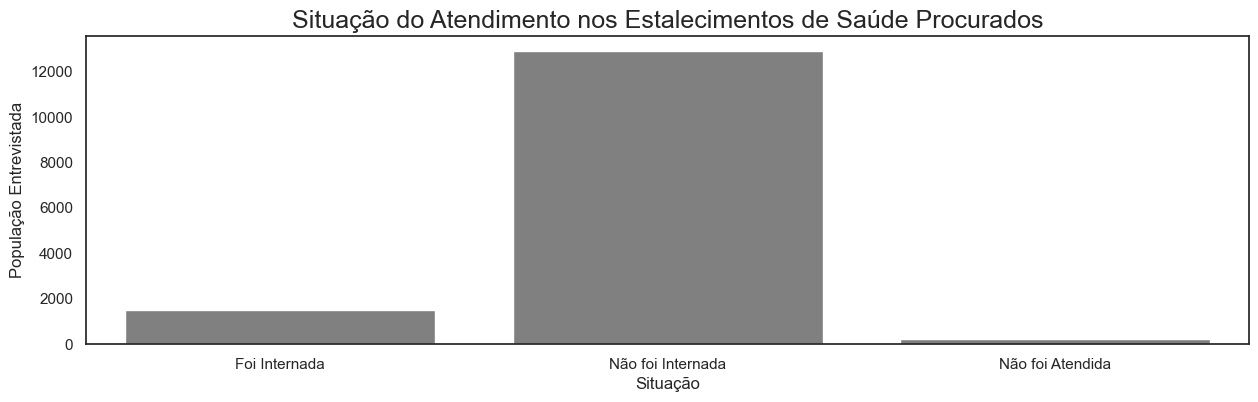

In [20]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=df_atendimento, x='situacao_atendimento', y='total', color='gray')
ax.set_title(f'Situação do Atendimento nos Estalecimentos de Saúde Procurados', fontsize = 18, horizontalalignment = "center")
ax.set_xlabel('Situação', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Felizmente a maior parte da população entrevistada não precisou ser internada por um dia ou mais, e a menor parcela é da situação "Não foi Atendida".

### Análise dos Testes de COVID-19

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Nesta análise queremos obter respostas sobre os testes mais utilizados e quais o resultados apresentados por cada teste.

In [21]:
colunas_testes = ['qtd_pop_fez_teste_covid_swab', 'qtd_pop_teste_swab_positivo', 'qtd_pop_teste_swab_negativo', 'qtd_pop_teste_swab_inconclusivo', 'qtd_pop_teste_swab_sem_resultado',
                  'qtd_pop_fez_teste_covid_furo_dedo', 'qtd_pop_teste_furo_dedo_positivo', 'qtd_pop_teste_furo_dedo_negativo', 'qtd_pop_teste_furo_dedo_inconclusivo', 'qtd_pop_teste_furo_dedo_sem_resultado',
                  'qtd_pop_fez_teste_covid_veia', 'qtd_pop_teste_veia_positivo', 'qtd_pop_teste_veia_negativo', 'qtd_pop_teste_veia_inconclusivo', 'qtd_pop_teste_veia_sem_resultado'
                 ]

ds_testes = {'qtd_pop_fez_teste_covid_swab':('Teste Swab', 'Fez Teste'),
             'qtd_pop_teste_swab_positivo':('Teste Swab', 'Positivo'),
             'qtd_pop_teste_swab_negativo':('Teste Swab', 'Negativo'),
             'qtd_pop_teste_swab_inconclusivo':('Teste Swab', 'Inconclusivo'),
             'qtd_pop_teste_swab_sem_resultado':('Teste Swab', 'Sem Resultado'),
             'qtd_pop_fez_teste_covid_furo_dedo':('Teste Coleta - Furo no dedo', 'Fez Teste'),
             'qtd_pop_teste_furo_dedo_positivo':('Teste Coleta - Furo no dedo', 'Positivo'),
             'qtd_pop_teste_furo_dedo_negativo':('Teste Coleta - Furo no dedo', 'Negativo'),
             'qtd_pop_teste_furo_dedo_inconclusivo':('Teste Coleta - Furo no dedo', 'Inconclusivo'),
             'qtd_pop_teste_furo_dedo_sem_resultado':('Teste Coleta - Furo no dedo', 'Sem Resultado'),
             'qtd_pop_fez_teste_covid_veia':('Teste Coleta - Veia do Braço', 'Fez Teste'),
             'qtd_pop_teste_veia_positivo':('Teste Coleta - Veia do Braço', 'Positivo'),
             'qtd_pop_teste_veia_negativo':('Teste Coleta - Veia do Braço', 'Negativo'),
             'qtd_pop_teste_veia_inconclusivo':('Teste Coleta - Veia do Braço', 'Inconclusivo'),
             'qtd_pop_teste_veia_sem_resultado':('Teste Coleta - Veia do Braço', 'Sem Resultado'),
            }

df_testes = dados_visitou_estab_saude[colunas_testes].T
df_testes ['total'] = df_testes .apply(lambda x: sum(x[:]), axis=1)
df_testes = df_testes.reset_index()
df_testes['teste'] = df_testes['index'].apply(lambda x: ds_testes[x][0])
df_testes['resultado'] = df_testes['index'].apply(lambda x: ds_testes[x][1])
df_testes

,index,0,1,2,3,4,5,6,total,teste,resultado
0,qtd_pop_fez_teste_covid_swab,0,0,1695,2087,1670,1620,2219,9291,Teste Swab,Fez Teste
1,qtd_pop_teste_swab_positivo,0,0,734,831,663,630,798,3656,Teste Swab,Positivo
2,qtd_pop_teste_swab_negativo,0,0,634,952,807,826,1044,4263,Teste Swab,Negativo
3,qtd_pop_teste_swab_inconclusivo,0,0,11,11,21,13,20,76,Teste Swab,Inconclusivo
4,qtd_pop_teste_swab_sem_resultado,0,0,316,292,179,151,356,1294,Teste Swab,Sem Resultado
5,qtd_pop_fez_teste_covid_furo_dedo,0,0,1887,1901,1663,1504,1575,8530,Teste Coleta - Furo no dedo,Fez Teste
6,qtd_pop_teste_furo_dedo_positivo,0,0,649,649,538,410,382,2628,Teste Coleta - Furo no dedo,Positivo
7,qtd_pop_teste_furo_dedo_negativo,0,0,1157,1187,1080,1066,1143,5633,Teste Coleta - Furo no dedo,Negativo
8,qtd_pop_teste_furo_dedo_inconclusivo,0,0,21,25,16,18,13,93,Teste Coleta - Furo no dedo,Inconclusivo
9,qtd_pop_teste_furo_dedo_sem_resultado,0,0,60,40,28,10,37,175,Teste Coleta - Furo no dedo,Sem Resultado


In [22]:
testes = df_testes[df_testes['resultado'] == 'Fez Teste']
testes

,index,0,1,2,3,4,5,6,total,teste,resultado
0,qtd_pop_fez_teste_covid_swab,0,0,1695,2087,1670,1620,2219,9291,Teste Swab,Fez Teste
5,qtd_pop_fez_teste_covid_furo_dedo,0,0,1887,1901,1663,1504,1575,8530,Teste Coleta - Furo no dedo,Fez Teste
10,qtd_pop_fez_teste_covid_veia,0,0,1403,1402,1182,1006,1048,6041,Teste Coleta - Veia do Braço,Fez Teste


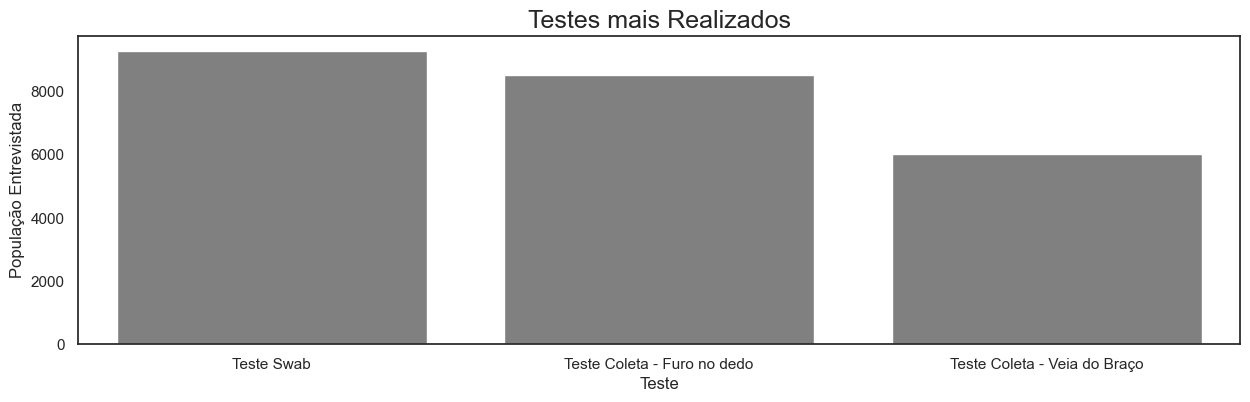

In [23]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=testes, x='teste', y='total', color='gray')
ax.set_title(f'Testes mais Realizados', fontsize = 18, horizontalalignment = "center")
ax.set_xlabel('Teste', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.show()

In [24]:
resultados = df_testes[df_testes['resultado'] != 'Fez Teste']
resultados

,index,0,1,2,3,4,5,6,total,teste,resultado
1,qtd_pop_teste_swab_positivo,0,0,734,831,663,630,798,3656,Teste Swab,Positivo
2,qtd_pop_teste_swab_negativo,0,0,634,952,807,826,1044,4263,Teste Swab,Negativo
3,qtd_pop_teste_swab_inconclusivo,0,0,11,11,21,13,20,76,Teste Swab,Inconclusivo
4,qtd_pop_teste_swab_sem_resultado,0,0,316,292,179,151,356,1294,Teste Swab,Sem Resultado
6,qtd_pop_teste_furo_dedo_positivo,0,0,649,649,538,410,382,2628,Teste Coleta - Furo no dedo,Positivo
7,qtd_pop_teste_furo_dedo_negativo,0,0,1157,1187,1080,1066,1143,5633,Teste Coleta - Furo no dedo,Negativo
8,qtd_pop_teste_furo_dedo_inconclusivo,0,0,21,25,16,18,13,93,Teste Coleta - Furo no dedo,Inconclusivo
9,qtd_pop_teste_furo_dedo_sem_resultado,0,0,60,40,28,10,37,175,Teste Coleta - Furo no dedo,Sem Resultado
11,qtd_pop_teste_veia_positivo,0,0,561,553,463,373,373,2323,Teste Coleta - Veia do Braço,Positivo
12,qtd_pop_teste_veia_negativo,0,0,705,749,641,577,623,3295,Teste Coleta - Veia do Braço,Negativo


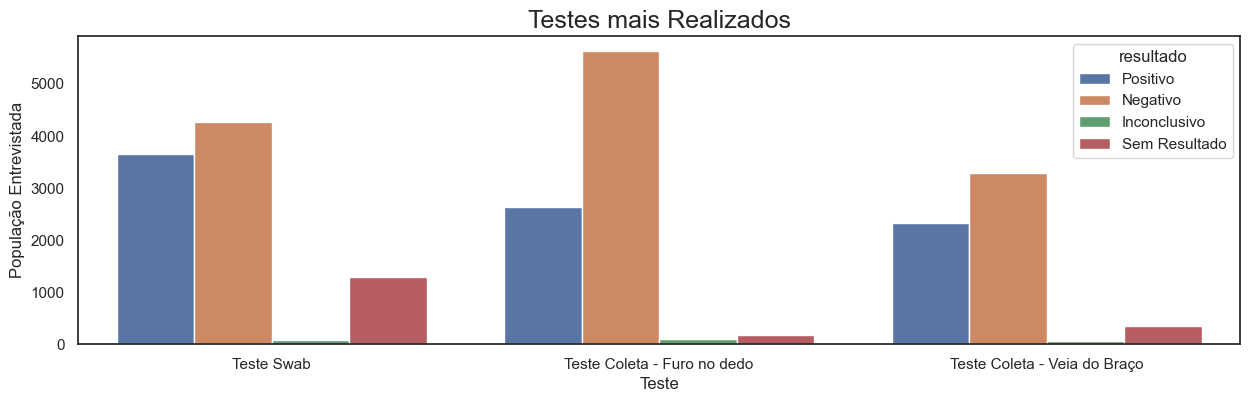

In [25]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=resultados, x='teste', y='total', hue='resultado')
ax.set_title(f'Testes mais Realizados', fontsize = 18, horizontalalignment = "center")
ax.set_xlabel('Teste', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O teste Swab foi o mais procurando entre os entrevistados, e foi o que mais obteve resultados positivos. A coleta de material por swab hoje possui 3 testes para detectar o vírus, sendo o RT-PCR o teste de padrão ouro por detectar amostras genéticas do vírus em amostras respiratórias. Outro ponto importante é que os testes abordados não apresentaram valores significativos de resultados inconclusivos.

### Qual foi o comportamento das pessoas que não procuraram um estabelecimento de saúde?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Analisamos o caso das pessoas que procuraram um estabelecimento de saúde logo após apresentarem sintomas, e agora vamos analisar o comportamento das pessoas que não procuraram nenhum estabelecimento de saúde.

In [26]:
colunas_nao_visitou = ['qtd_pop_nao_visitou_estab_saude_ficou_em_casa', 'qtd_pop_nao_visitou_estab_saude_ligou_prof_saude',
                       'qtd_pop_nao_visitou_estab_saude_auto_medicou', 'qtd_pop_nao_visitou_estab_saude_recebeu_medicacao',
                       'qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_sus', 
                       'qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_part','qtd_pop_nao_visitou_estab_saude_outro'
                      ]

ds_nao_visitou = {'qtd_pop_nao_visitou_estab_saude_ficou_em_casa':'Ficou em Casa',
                  'qtd_pop_nao_visitou_estab_saude_ligou_prof_saude':'Ligou p/ Profissional',
                  'qtd_pop_nao_visitou_estab_saude_auto_medicou':'Auto Medicou',
                  'qtd_pop_nao_visitou_estab_saude_recebeu_medicacao':'Orientado a se Medicar',
                  'qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_sus':'Visita - Agente SUS',
                  'qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_part':'Visita - Agente Part.',
                  'qtd_pop_nao_visitou_estab_saude_outro': 'Outro'
                 }

df_nao_visitou = dados_visitou_estab_saude[colunas_nao_visitou].T
df_nao_visitou['total'] = df_nao_visitou.apply(lambda x: sum(x[:]), axis=1)
df_nao_visitou = df_nao_visitou.reset_index()
df_nao_visitou['motivo'] = df_nao_visitou['index'].apply(lambda x: ds_nao_visitou[x])
df_nao_visitou

,index,0,1,2,3,4,5,6,total,motivo
0,qtd_pop_nao_visitou_estab_saude_ficou_em_casa,26736,18712,15542,12901,9341,7540,7439,98211,Ficou em Casa
1,qtd_pop_nao_visitou_estab_saude_ligou_prof_saude,1902,1253,862,695,369,289,317,5687,Ligou p/ Profissional
2,qtd_pop_nao_visitou_estab_saude_auto_medicou,18373,13403,11714,10387,7635,6305,6468,74285,Auto Medicou
3,qtd_pop_nao_visitou_estab_saude_recebeu_medicacao,4752,3180,2513,2016,1466,1126,1076,16129,Orientado a se Medicar
4,qtd_pop_nao_visitou_estab_saude_recebeu_visita...,1050,712,617,494,283,241,219,3616,Visita - Agente SUS
5,qtd_pop_nao_visitou_estab_saude_recebeu_visita...,286,146,111,82,46,54,48,773,Visita - Agente Part.
6,qtd_pop_nao_visitou_estab_saude_outro,876,567,481,446,269,213,252,3104,Outro


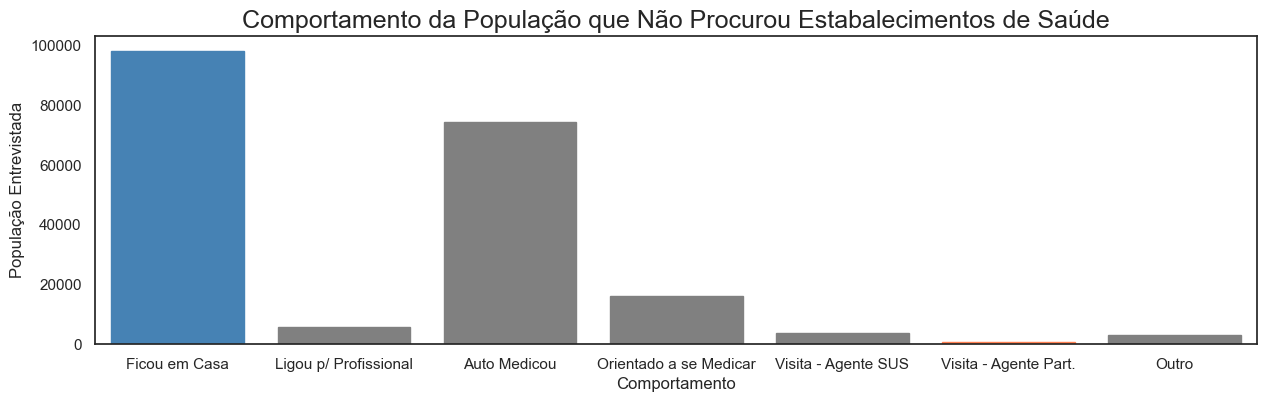

In [27]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=df_nao_visitou, x='motivo', y='total', color='gray')

maior = df_nao_visitou['total'].max()
menor = df_nao_visitou['total'].min()

for bar in ax.patches:
        if bar.get_height() == maior:
            bar.set_color('steelblue')    
        elif bar.get_height() == menor:
            bar.set_color('coral')
        else:
            bar.set_color('gray')

ax.set_title(f'Comportamento da População que Não Procurou Estabalecimentos de Saúde', fontsize = 18, horizontalalignment = "center")
ax.set_xlabel('Comportamento', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A maior parte das pessoas ficou em casa. O resultado era esperado, como a melhor forma de evitar a propagação do vírus era o isolamento social, é comum que as pessoas que apresentaram sintomas, até saber da gravidade ou decidir procurar um estabelecimento de saúde, ficassem em casa.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Porém, um ponto de atenção vai para o grupo que se auto medicou. No começo da pandemia não era certo quais remédios eram efetivos contra o vírus da COVID-19, e este hábito de se auto medicar pode ser perigoso quando não sabemos de fato qual a gravidade de um vírus.

## Características Econômicas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Já analisamos características sociais e o comportamento das pessoas entrevistadas que apresentaram sintomas, agora olharemos um pouco para algumas características econômicas.

### Análise do Ganho Médio

In [28]:
dados_uf_mes = dados.groupby(['ds_mes','uf'])[['vl_ganho_mes_referencia']].sum().reset_index()
dados_uf_mes.head()

,ds_mes,uf,vl_ganho_mes_referencia
0,Ago,AC,256715.0
1,Ago,AL,216332.0
2,Ago,AM,255461.0
3,Ago,AP,132745.0
4,Ago,BA,687217.0


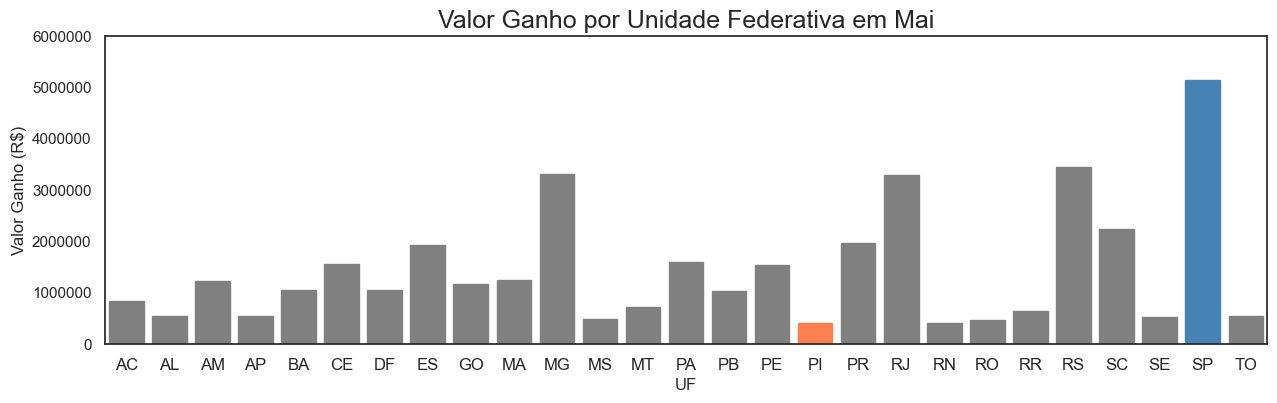

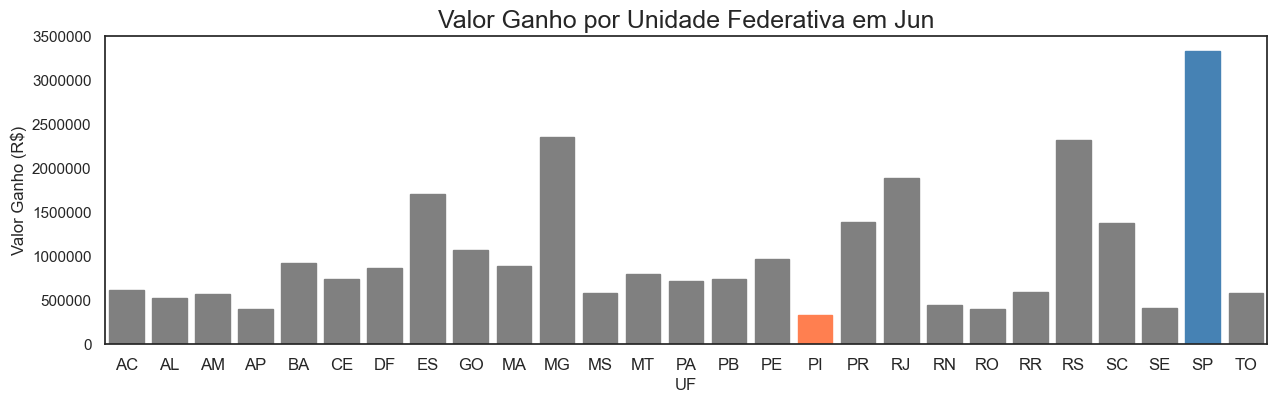

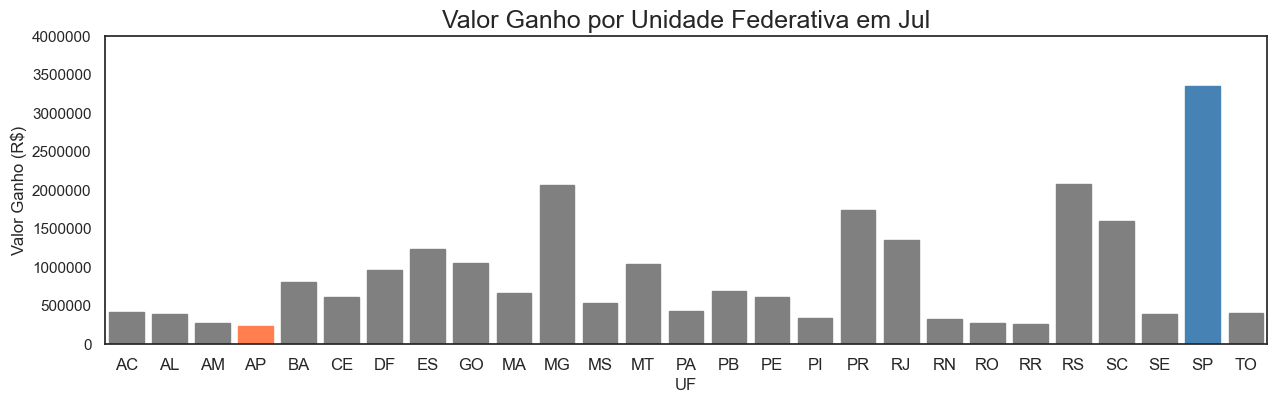

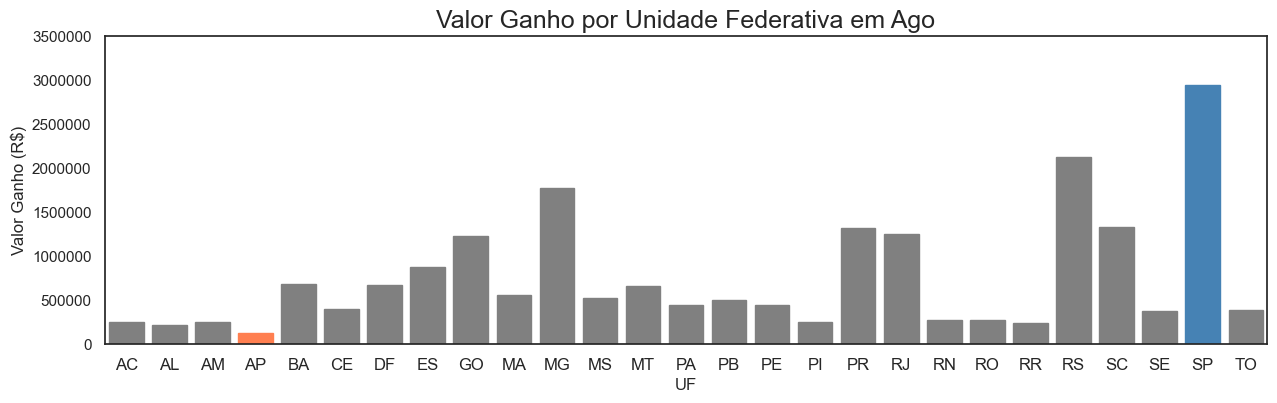

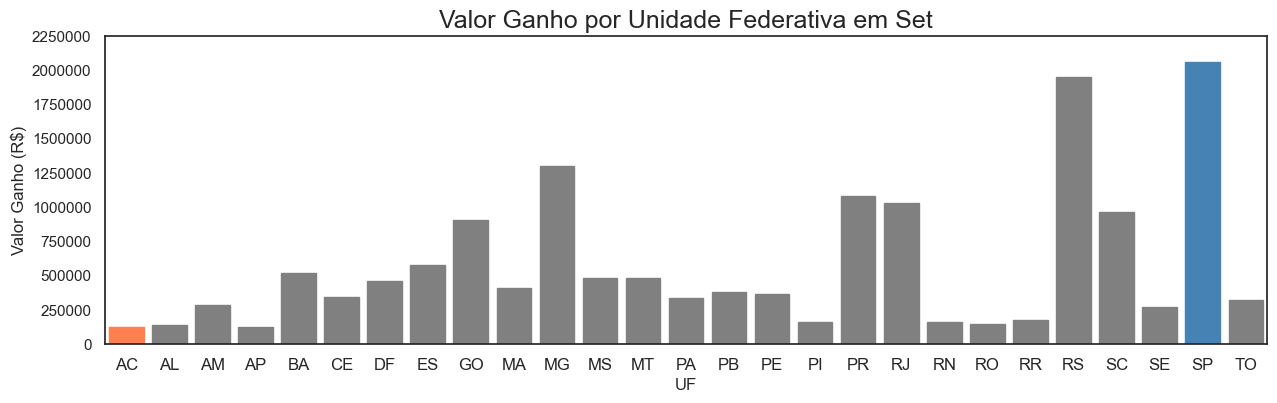

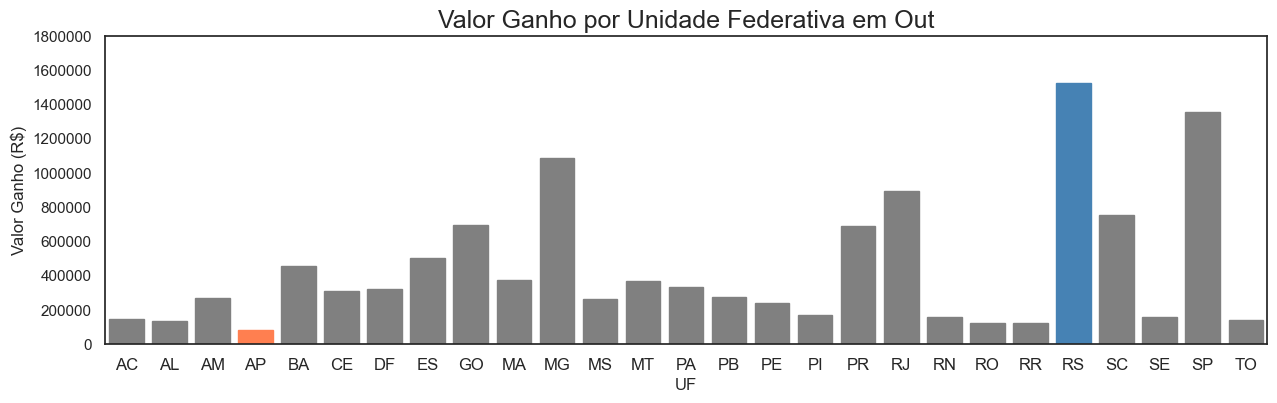

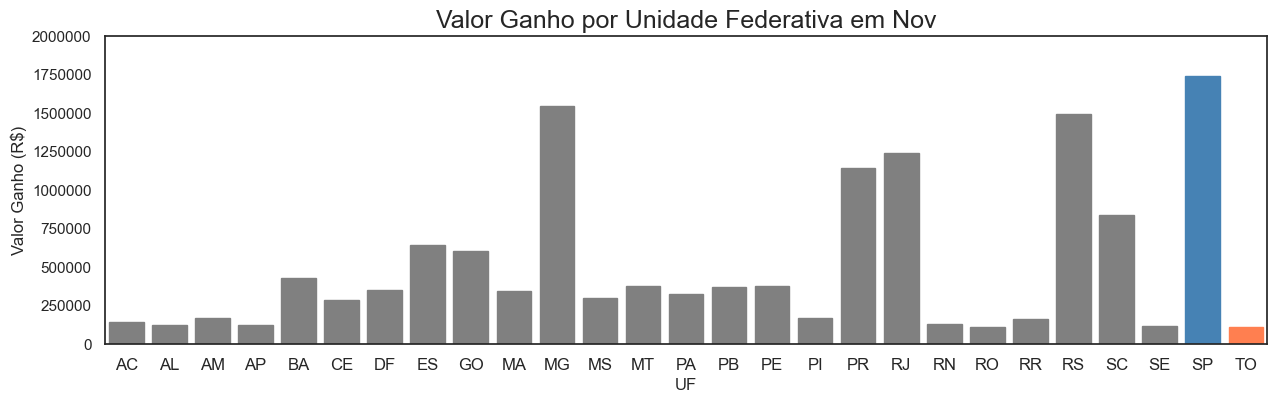

In [29]:
for mes in dados['ds_mes'].unique():
    plt.figure(figsize=(15,4))
    df_mensal = dados_uf_mes[dados_uf_mes['ds_mes'] == mes]
    maior_ganho = df_mensal['vl_ganho_mes_referencia'].max()
    menor_ganho = df_mensal['vl_ganho_mes_referencia'].min()
    ax = sns.barplot(data=df_mensal, x='uf', y='vl_ganho_mes_referencia')
    for bar in ax.patches:
        if bar.get_height() == maior_ganho:
            bar.set_color('steelblue')    
        elif bar.get_height() == menor_ganho:
            bar.set_color('coral')
        else:
            bar.set_color('gray')

    xtick_loc = ax.get_xticks()
    xtick_labels = ax.get_xticklabels()

    ytick_loc = ax.get_yticks()
    ytick_labels = ax.get_yticklabels()

    ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)
    ax.set_yticks(ticks = ytick_loc, fontsize = 12)

    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

    ax.set_xlabel('UF', fontsize = 12)
    ax.set_ylabel('Valor Ganho (R$)', fontsize = 12)
    ax.set_title(f'Valor Ganho por Unidade Federativa em {mes}', fontsize = 18, horizontalalignment = "center")

    plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    De maneira geral, existiu uma queda enorme do ganho médio da população entrevistada do mês de Maio de 2020 para Novembro de 2020, o que pode ser justificado pelo da diminuição de pessoas entrevistadas durante o período. São Paulo, foi o Estado com maior ganho em quase todos os meses, sendo superado pelo Rio Grande do Sul apenas em Outubro de 2020. Outro ponto importante é que os Estados com menores ganhos estão localizados nas Regiões Norte e Nodeste do país. O Piauí teve o menor ganho em Maio e Junho, e o Amapá apareceu 3 vezes como o Estado com o menor ganho em 7 meses.

### Análise de Rendimentos Recebidos de Outras Fontes

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vimos anteriormente o quanto o ganho médio por Estado sofreu quedas ao longos do 7 meses em estudo, e mesmo sabendo que a quantidade de pessoas entrevistadas também diminuiu, esse é um fator preocupante. Portanto, vamos analisar quais outras fontes de renda a população entrevistada tinha para poder sobreviver durante a pendemia.

In [30]:
colunas = ['qtd_pop_nao_visitou_estab_saude', 'qtd_pop_nao_visitou_estab_saude_ficou_em_casa',
           'qtd_pop_nao_visitou_estab_saude_ligou_prof_saude','qtd_pop_nao_visitou_estab_saude_auto_medicou',
           'qtd_pop_nao_visitou_estab_saude_recebeu_medicacao','qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_sus',
           'qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_part','qtd_pop_nao_visitou_estab_saude_outro']

dados_nao_visitou_estab_saude = dados_comportamento.groupby(['mes','ds_mes'])[colunas].sum().reset_index()
dados_nao_visitou_estab_saude['percentual'] = round(dados_visitou_estab_saude['qtd_pop_visitou_estab_saude'] / dados_visitou_estab_saude['qtd_pop'] * 100, 2)
dados_nao_visitou_estab_saude.head()

,mes,ds_mes,qtd_pop_nao_visitou_estab_saude,qtd_pop_nao_visitou_estab_saude_ficou_em_casa,qtd_pop_nao_visitou_estab_saude_ligou_prof_saude,qtd_pop_nao_visitou_estab_saude_auto_medicou,qtd_pop_nao_visitou_estab_saude_recebeu_medicacao,qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_sus,qtd_pop_nao_visitou_estab_saude_recebeu_visita_prof_part,qtd_pop_nao_visitou_estab_saude_outro,percentual
0,5,Mai,32119,26736,1902,18373,4752,1050,286,876,15.80
1,6,Jun,22557,18712,1253,13403,3180,712,146,567,20.21
2,7,Jul,19661,15542,862,11714,2513,617,111,481,22.65
3,8,Ago,17228,12901,695,10387,2016,494,82,446,23.56
4,9,Set,12752,9341,369,7635,1466,283,46,269,24.36


In [31]:
colunas_auxilios = ['qtd_pop_recebeu_aposentadoria_pensao', 'qtd_pop_recebeu_pensao_alimenticia', 
                    'qtd_pop_recebeu_bolsa_familia', 'qtd_pop_recebeu_bpc_loas', 'qtd_pop_recebeu_auxilio_emergencial',
                    'qtd_pop_recebeu_seguro_desemprego', 'qtd_pop_recebeu_outros_rendimentos']

ds_auxilios = {'qtd_pop_recebeu_aposentadoria_pensao':'Aposentadoria',
               'qtd_pop_recebeu_pensao_alimenticia':'Pensão Alimentícia',
               'qtd_pop_recebeu_bolsa_familia':'Bolsa Família',
               'qtd_pop_recebeu_bpc_loas':'BPC-LOAS',
               'qtd_pop_recebeu_auxilio_emergencial':'Auxílio Emergencial',
               'qtd_pop_recebeu_seguro_desemprego':'Seguro Desemprego',
               'qtd_pop_recebeu_outros_rendimentos': 'Outros Rendimentos'
              }

df_auxilios = dados_visitou_estab_saude[colunas_auxilios].T
df_auxilios['total'] = df_auxilios.apply(lambda x: sum(x[:]), axis=1)
df_auxilios = df_auxilios.reset_index()
df_auxilios['auxilio'] = df_auxilios['index'].apply(lambda x: ds_auxilios[x])
df_auxilios

,index,0,1,2,3,4,5,6,total,auxilio
0,qtd_pop_recebeu_aposentadoria_pensao,12152,9289,8522,7529,5956,4759,4832,53039,Aposentadoria
1,qtd_pop_recebeu_pensao_alimenticia,2472,1846,1703,1446,1091,940,862,10360,Pensão Alimentícia
2,qtd_pop_recebeu_bolsa_familia,5072,2508,1519,1279,742,1340,1346,13806,Bolsa Família
3,qtd_pop_recebeu_bpc_loas,1293,1090,1047,948,724,676,597,6375,BPC-LOAS
4,qtd_pop_recebeu_auxilio_emergencial,18150,15019,13276,12068,8676,7037,6666,80892,Auxílio Emergencial
5,qtd_pop_recebeu_seguro_desemprego,872,634,593,484,283,239,193,3298,Seguro Desemprego
6,qtd_pop_recebeu_outros_rendimentos,2029,1570,1464,1268,1084,833,888,9136,Outros Rendimentos


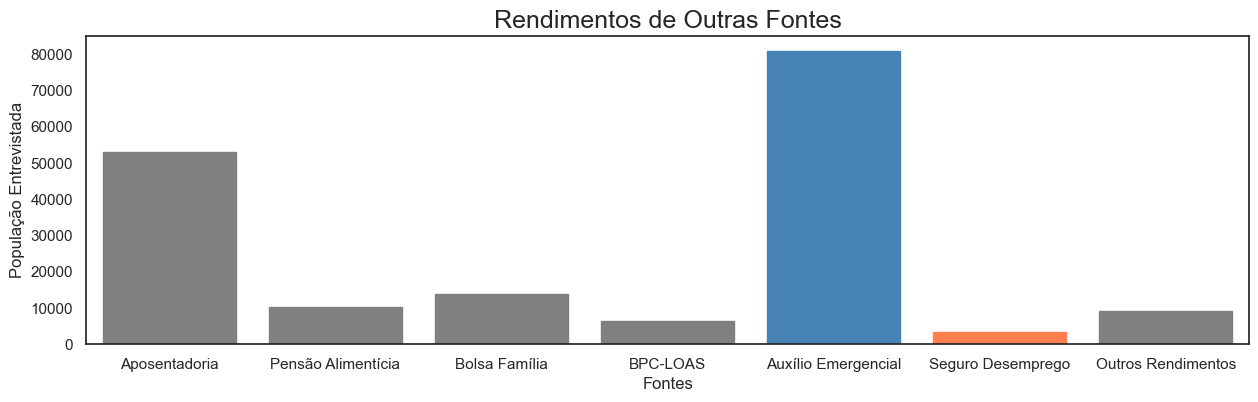

In [32]:
plt.figure(figsize=(15,4))

ax = sns.barplot(data=df_auxilios, x='auxilio', y='total', color='gray')

maior = df_auxilios['total'].max()
menor = df_auxilios['total'].min()

for bar in ax.patches:
        if bar.get_height() == maior:
            bar.set_color('steelblue')    
        elif bar.get_height() == menor:
            bar.set_color('coral')
        else:
            bar.set_color('gray')

ax.set_title(f'Rendimentos de Outras Fontes', fontsize = 18, horizontalalignment = "center")
ax.set_xlabel('Fontes', fontsize = 12)
ax.set_ylabel('População Entrevistada', fontsize = 12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O auxílio emergencial é a maior fonte de renda alternativa das pessoas entrevistadas, seguido da aposentadoria. O seguro desemprego foi a menor fonte de renda alternativa, porém aqui cabem duas hipóteses. A primeira, é que no começo poucas pessoas perderam seus empregos, e a segunda é que para quem perdeu o emprego, o benefício pode ter demorado para ser liberado. 

# Conclusão

## Caso ocorra um novo surto, o que fazer?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Caso ocorra um novo surto da COVID-19, baseado no presente estudo, os melhores indicadores para se acompanhar são:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'> 
<li>Grau de Escolaridade: Este indicador mostra como a população está distribuída educacionalmente, o que é importante quando sabemos que pessoas com menos instruções não possuem empregos que lhes permitam ficar em casa, e provavelmente serão pessoas que precisarão de auxílio do governo. E a falta de educação e desinformação pode impactar de maneira negativa a contenção da propagação do vírus;</li>
<li>Taxa de Pessoas que Procuram Estabelecimentos de Saúde: Mostra o quanto as pessoas com sintomas procuram ajuda. Este indicador informa que quando há muita procura, é um sinal de atenção pois estabelecimentos de saúde podem ficar lotados;</li>
<li>Estabelecimentos Mais Procurados: Em conjunto com o indicador anterior, servirá para alertar sobre futuras lotações e ainda servirá para auxiliar na priorização da construção de novos estabelecimentos de acordo com a procura;</li>
<li>Precisão do Teste: Este indicador visa mostrar o quão precisos são os testes utilizados para a detecção do vírus;</li>
<li>Fonte Alternativa de Renda: Este indicador é importante para alertar sobre qual fonte de renda alternativa é a principal para a população no momento de um surto pandêmico;</li>
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Estes são alguns indicadores importantes de se acompanhar, porém ainda valem algumas boas práticas dentro de um surto de um vírus. O isolamento social se mostrou ser o melhor jeito de combater a propagação do vírus. E pessoas que se auto medicam, sem informações o suficiente, ou até por falta de instrução, podem estar se colocando em perigo desnecessariamente, então é de extrema importância o trabalho de hospitais em conjunto com os veículo de comunicação, para divulgar informações e práticas corretas de combate ao vírus. 

# Referências

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
IBGE. PNAD - Pesquisa Nacional por Amostra de Domicílios. Disponível em: https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=o-que-e. Acesso em: 01 de março de 2024.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
EQUIPE DASA. Qual o exame mais confiável para COVID-19?. Atualizado em 29/07/2020. Disponível em: https://dasa.com.br/blog/coronavirus/qual-o-exame-mais-confiavel-para-covid-19/#:~:text=Todos%20estes%20testes%20s%C3%A3o%20realizados,do%20v%C3%ADrus%20em%20amostras%20respirat%C3%B3rias. Acesso em: 12 de março de 2024.